In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Zad
Wygeneruj dane z rozkładu N(m,\Sigma)
gdzie
$$
m = [0,0,0]
$$
oraz 
$$
\Sigma = 
\begin{bmatrix}
    1 & 0.999 & 0\\
    0.999 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

Narysuj wykresy 
* pairplot
* heatmapę korelacji 

In [16]:
X = np.random.multivariate_normal([0,0,0],np.array([[1,0.999,0],[0.999,1,0],[0,0,1]]),20)
print(X)

[[ 0.36720168  0.34375164 -1.00581984]
 [-0.23660343 -0.23675592 -1.99185171]
 [-0.6895745  -0.6427462   0.71833271]
 [ 0.49573145  0.54792049  0.61114656]
 [ 0.17448761  0.16006794 -0.66659047]
 [-0.70570767 -0.7235217   0.13216416]
 [ 1.70016143  1.68017404 -0.40089744]
 [-1.40269104 -1.48070327  0.31808069]
 [-0.88069417 -0.87544611 -1.24685389]
 [ 0.14477513  0.21466355  1.91767997]
 [ 1.54967984  1.57005286 -0.04086136]
 [ 0.43894201  0.40989083 -2.40351821]
 [ 0.28860593  0.30371127 -0.65139339]
 [-0.48692331 -0.5222627  -0.21259778]
 [ 2.23031775  2.32510883 -0.09600896]
 [ 1.08746826  1.18333515  0.81079061]
 [-0.81813163 -0.81708407  1.02668608]
 [ 0.41147818  0.491386   -0.81441771]
 [-0.06743973 -0.0155666   1.5934793 ]
 [ 1.36906501  1.35848818  0.28260787]]


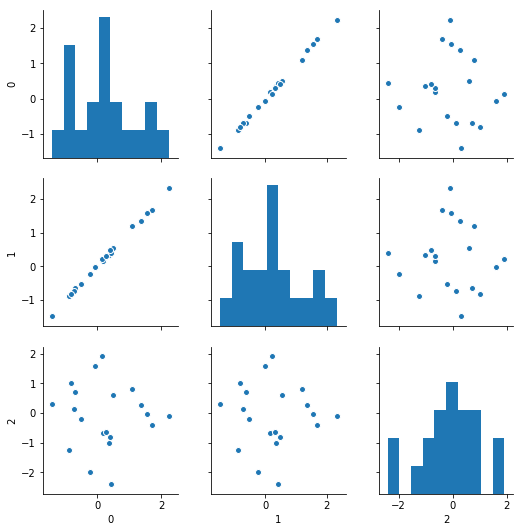

In [17]:
df=pd.DataFrame(X)
sns.pairplot(df)
plt.show()

## Czyli mamy dwie bardzo silnie skorelowane zmienne

# Zad
Proszę wykonać rozkład SVD za pomocą
```python
    np.linalg.svd()
```

In [18]:
U, s, V = np.linalg.svd(X, full_matrices=True)

print("U:\n", U)
S = np.zeros((X.shape[0], X.shape[1]))
# populate Sigma with n x n diagonal matrix
S[:X.shape[1], :X.shape[1]] = np.diag(s)
print("S\n", S)
print("V^T:\n", V)

U:
 [[-9.86521498e-02  1.96841253e-01  8.98375275e-02 -9.59807414e-02
  -4.43134448e-02  1.59632393e-01 -4.19914164e-01  2.92313236e-01
   2.28267364e-01 -1.30178232e-02 -3.63646508e-01 -1.00494561e-01
  -5.51758941e-02  9.97693321e-02 -4.85431289e-01 -2.16253970e-01
   1.89304413e-01 -4.62334351e-02  3.11419489e-02 -3.40664872e-01]
 [ 1.64112360e-02  4.21812412e-01 -2.31207215e-01 -1.00636357e-01
  -7.81578366e-03  1.16011608e-02  2.86980735e-01  2.54472142e-01
  -3.58823797e-01 -3.14815505e-02  1.12974571e-01 -1.75673061e-01
  -1.42821701e-01  7.88548005e-02 -1.85216699e-01 -2.09843163e-01
   4.23907394e-02 -4.89716955e-01 -2.11712152e-02  3.00861348e-01]
 [ 1.63264524e-01 -1.26571906e-01 -3.00533992e-01 -1.91820597e-01
   1.46103483e-01 -1.36767602e-03  1.21794242e-01  5.73960263e-02
   2.08665335e-01 -4.60881403e-01 -1.12835058e-02  4.87209490e-01
   9.58372136e-02  9.20046568e-02 -1.17291559e-01 -2.94203028e-01
  -1.95457436e-01  1.98433000e-02 -3.74558016e-01 -2.06266596e-02]
 [-

# Zad
wypisz macierz S

In [19]:
S   #   Widzimy, że trzeci wymiar nie niesie dużo informacji (wzgledem wczesniejszych)

array([[6.2373209 , 0.        , 0.        ],
       [0.        , 4.78171917, 0.        ],
       [0.        , 0.        , 0.12135012],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

Mówiliśmy, że oryginalna macierz może zostać odtworzona z rozkładu SVD. 

Ciekawsze z naszego punktu widzenia jest to, że dane można zapisać używając mniejszej ilości komponentów, czyli skompresować, a później odtworzyć w sposób stratny. 

Dokładniej bierzemy dane wymiaru $D$ i chcemy zredukować do wymiary $d<D$. Rozkład SVD daje nam przepis jak wrócić z wymiaru $d$ do wymiaru $D$ (ale stratnie).  

Mianowicie trzeba wziąć:
<ul>
<li> $d$ wierszy $V^T$</li>
<li> podmacierz $S$ wymiaru $d$ na $d$</li>
<li> $d$ kolumn $U$</li>
</ul>
i pomnożyć ze sobą. Zobacz na mnożenie macierzy SVD na wikipedii: https://en.wikipedia.org/wiki/Singular-value_decomposition



# Zad

Wyzeruj współrzędną odpowiadającą trzeciemu wymiarowi i odtwórz dana za pomocą nowej macierzy.

In [20]:
S[2,2]=0
print(S)

[[6.2373209  0.         0.        ]
 [0.         4.78171917 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


# Zad
Narysuj dane po redukcji wymiarowości.

In [21]:
X_new = np.dot(np.dot(U,S),V)

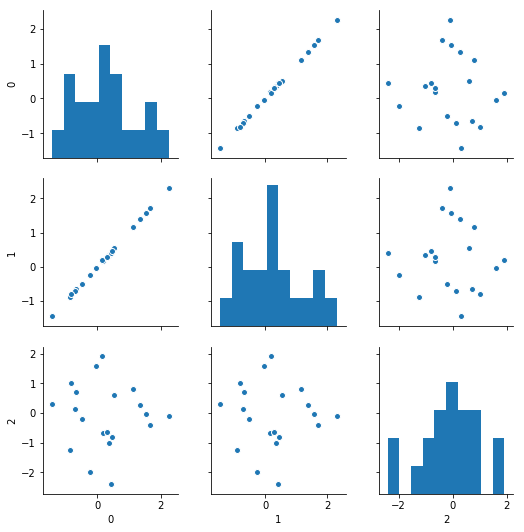

In [22]:
df_new=pd.DataFrame(X_new)
sns.pairplot(df_new)
plt.show()

Zamiast zerować wyrazy w macierzy  $S$ , można otrzymać to samo inaczej:

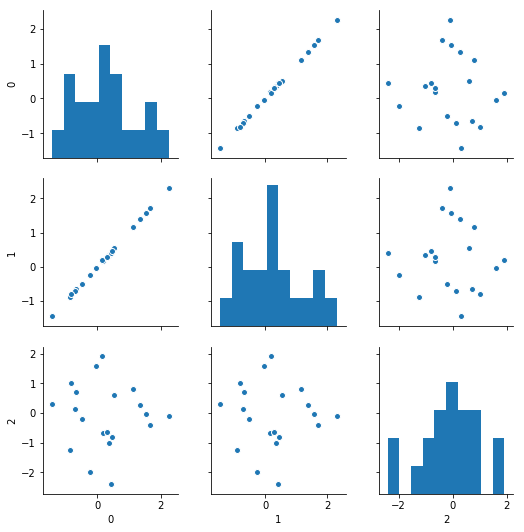

In [23]:
X_new = np.dot(np.dot(U[:,:2],S[:2,:2]),V[:2,:])

df_new=pd.DataFrame(X_new)
sns.pairplot(df_new)
plt.show()

# Zad 
Proszę wykonać powyższe zadania za pomocą funkcji 

```python
from sklearn.decomposition import TruncatedSVD as svd
svd_model = svd(n_components=2)
X_new = svd_model.fit_transform(X)
```

In [24]:
from sklearn.decomposition import TruncatedSVD as svd
svd_model = svd(n_components=2)
X_new = svd_model.fit_transform(X)

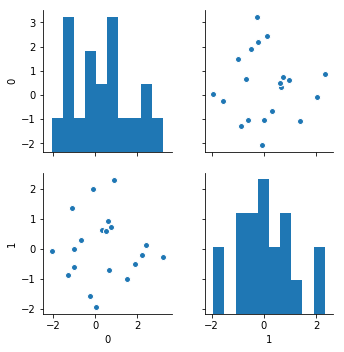

In [25]:
df_new=pd.DataFrame(X_new)
sns.pairplot(df_new)
plt.show()

# Zad

Za pomocą funkcji 

```python
from sklearn.decomposition import TruncatedSVD as svd
```

proszę wykonać redukcję wymiarowości na danych Iris

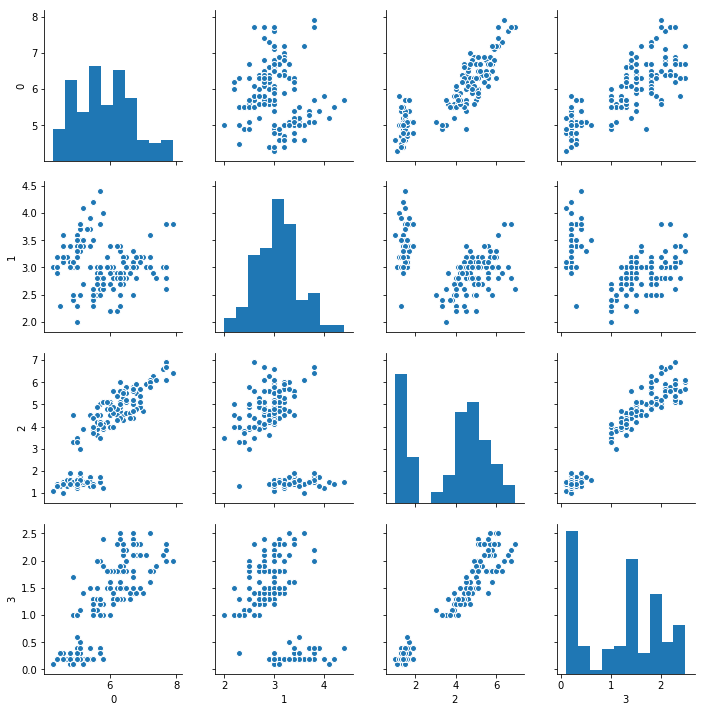

In [26]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data  
y = iris.target

df=pd.DataFrame(X)
sns.pairplot(df)
plt.show()

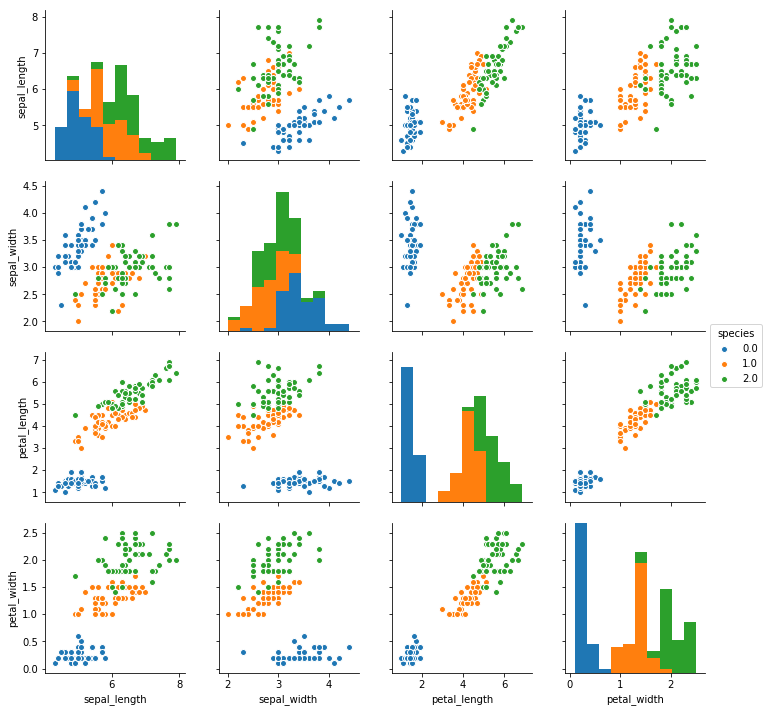

In [27]:
df=pd.DataFrame( np.hstack((X,np.reshape(y, (-1, 1)))), columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
    'species'])
df

sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue="species")
plt.show()

In [28]:
from sklearn.decomposition import TruncatedSVD as svd
